In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, assemble, transpile
from qiskit.providers.aer import AerSimulator

from numpy import pi
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

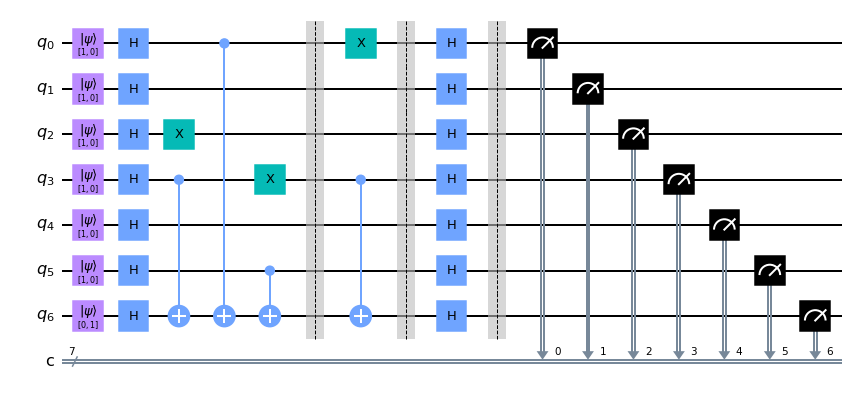

In [2]:
qreg_q = QuantumRegister(7, 'q')
creg_c = ClassicalRegister(7, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

for i in range(0,6):
    circuit.initialize([1,0],qreg_q[i])
circuit.initialize([0,1],qreg_q[6])
for i in range(0,7):
    circuit.h(qreg_q[i])
circuit.x(qreg_q[2]) 
circuit.cx(qreg_q[3],qreg_q[6])
circuit.cx(qreg_q[0],qreg_q[6])
circuit.x(qreg_q[3])
circuit.cx(qreg_q[5], qreg_q[6])
circuit.barrier(qreg_q[0],qreg_q[1],qreg_q[2],qreg_q[3],qreg_q[4],
                qreg_q[5],qreg_q[6])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[6])
circuit.barrier(qreg_q[0],qreg_q[1],qreg_q[2],qreg_q[3],qreg_q[4],
                qreg_q[5],qreg_q[6])
for i in range(0,7):
    circuit.h(qreg_q[i])
    
circuit.barrier(qreg_q[0],qreg_q[1],qreg_q[2],qreg_q[3],qreg_q[4],
                qreg_q[5],qreg_q[6])
for m in range(0,7):
    circuit.measure(qreg_q[m],creg_c[m])
circuit.draw()

In [3]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [4]:
backend = provider.get_backend('ibmq_qasm_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
job = backend.run(qobj)
ket = job.result().get_statevector()
ket


/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqbackend.py:906: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  return super().run(circuits, job_name=job_name,


array([0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+

In [5]:
hist = job.result().get_counts()
print(hist)

{'1100001': 1024}
